# Hyperinflation

In [1]:
#import inflatox
import inflatox
import sympy as sp
import numpy as np

In [8]:
sp.init_printing()
φ, θ, L, m, φ0 = sp.symbols('φ θ L m φ0')
fields = [φ, θ]

V = (1/2*m**2*(φ-φ0)**2).nsimplify()
g = [
  [1, 0],
  [0, L**2 * sp.sinh(φ/L)**2]
]

display(g, V)

In [5]:
calc = inflatox.SymbolicCalculation.new_from_list(fields, g, V)
hesse = calc.execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
out = inflatox.Compiler(hesse).compile()

In [7]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

args = np.array([1.0, 1.0, 1.0])
x = np.array([2.0, 2.0])
print(anguelova.calc_V(x, args))
print(anguelova.calc_H(x, args))

0.5
[[1.         0.        ]
 [0.         1.03731472]]


### Ja hier komt alleen maar `NaN` uit lol

In [7]:
extent = (-2.0, 2.0, -2.0, 2.0)
array = anguelova.evaluate(args, *extent)

In [8]:
print(np.nanmin(array))
print(np.nanmax(array))

-inf
inf


In [9]:
plt.imshow(array, norm=LogNorm(), extent=extent, aspect='equal')
plt.colorbar()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7fded1dc2700> (for post_execute):


ValueError: vmin must be less or equal to vmax

ValueError: vmin must be less or equal to vmax

<Figure size 640x480 with 2 Axes>

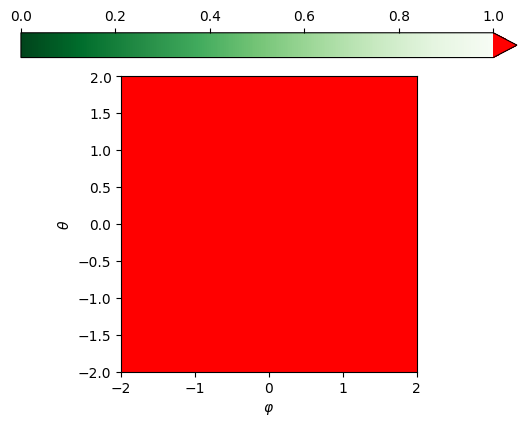

In [10]:
import matplotlib as mpl

cmap = mpl.colormaps['Greens'].copy().reversed()
cmap.set_over('red')
cmap.set_bad('red')

plt.imshow(
  array,
  extent=extent,
  cmap=cmap,
  norm=plt.Normalize(vmin=0.0, vmax=1.0),
  aspect='equal'
)
plt.colorbar(extend='max', location='top')

plt.xlabel(f'${sympy.latex(coords[0])}$')
plt.ylabel(f'${sympy.latex(coords[1])}$')
plt.show()